In [1]:
from measure_disparity import measure_disparity
import matplotlib.pyplot as plt
import numpy as np
from datasets.utils.meps_dataset_panel19_fy2015 import MEPSDataset19
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

np.random.seed(1)

pip install 'aif360[LawSchoolGPA]'


In [2]:
print("The test of measure_disparity starts now!")
privileged_groups = [{"RACE": 1}]
unprivileged_groups = [{"RACE": 0}]
dataset_orig = MEPSDataset19()

The test of measure_disparity starts now!


In [3]:
dataset = dataset_orig
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)
y_val_pred_prob = model.predict_proba(dataset.features)
pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
y_val_pred = (y_val_pred_prob[:, pos_ind] > 0.5).astype(np.float64)

str_y_val_pred_prob = []
for i in y_val_pred_prob:
    str_y_val_pred_prob.append(str(i.tolist()))
import pandas as pd
data_dic = {"Model prediction":str_y_val_pred_prob,"Binary outcome":dataset.labels.ravel(),"Model label":y_val_pred,"Sample weights":dataset.instance_weights,"Demographic data on protected and reference classes":dataset.protected_attributes.ravel()}

dataframe = pd.DataFrame(data_dic)

This dataset's SPD is 0.12412749579833537
This dataset's AOD is 0.12034131390194465
This dataset's EOD is 0.1957206775925332


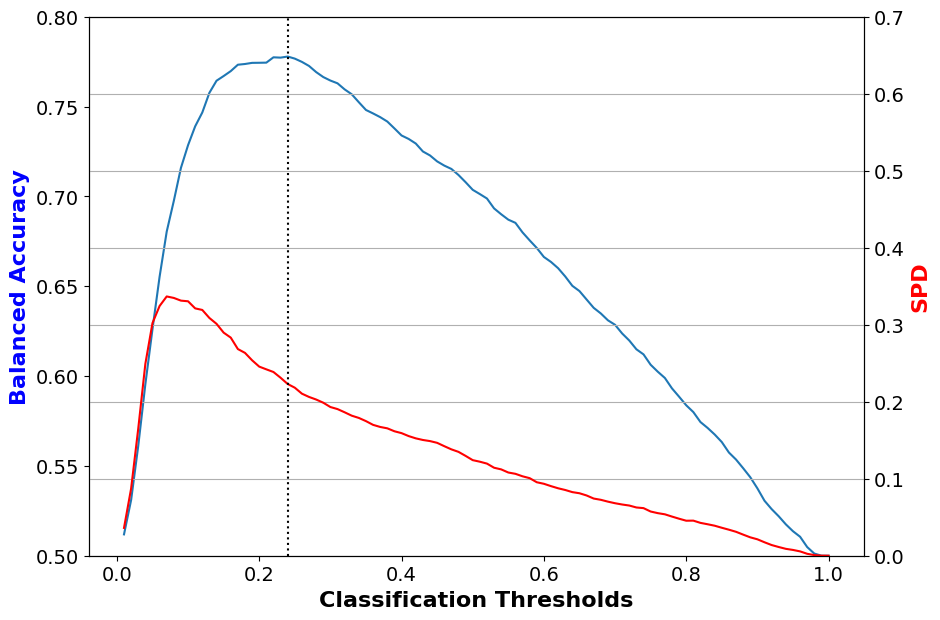

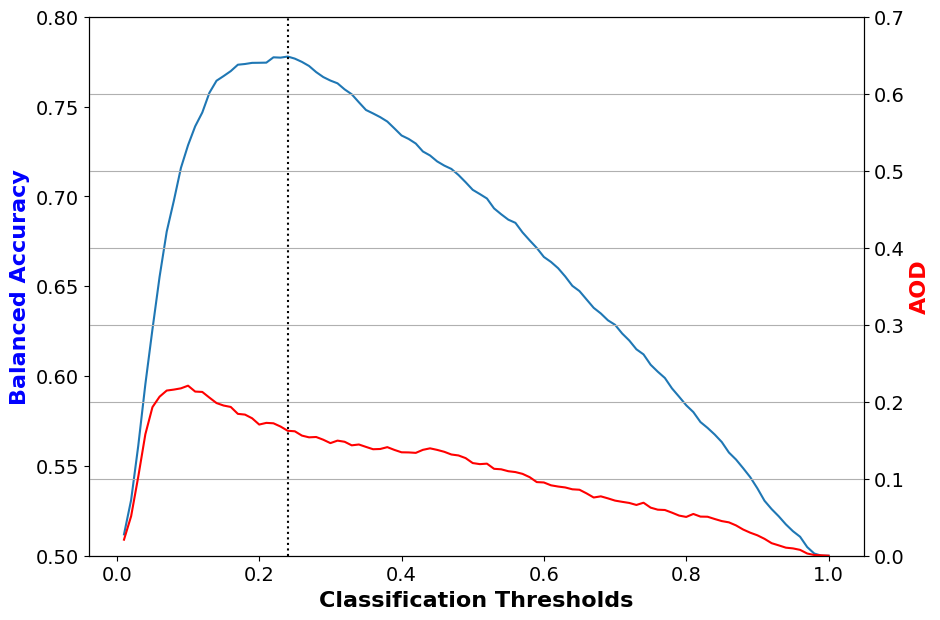

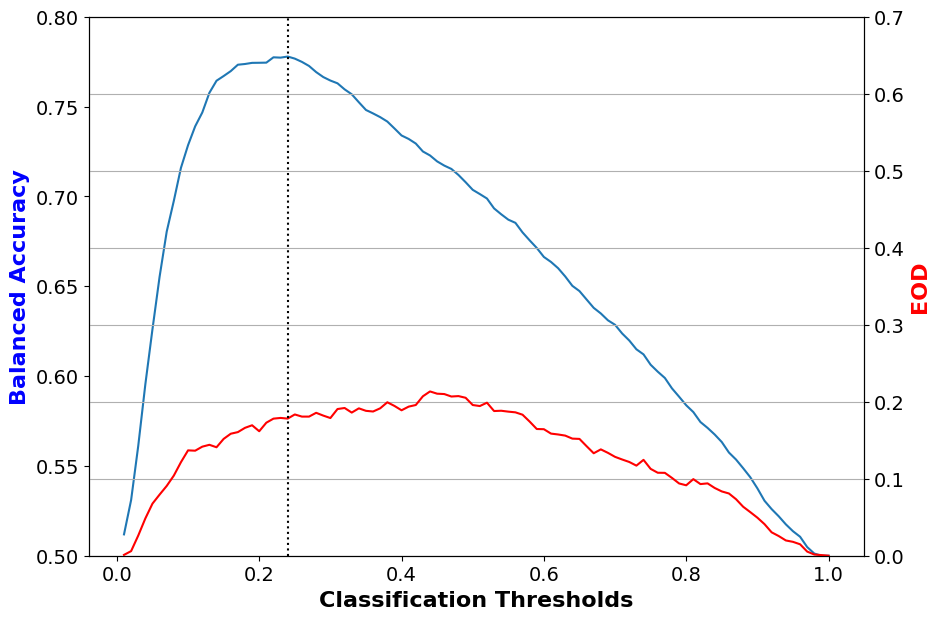

In [4]:
measure_disparity(dataframe)

In [5]:
print("The test of measure_disparity ends now!")

The test of measure_disparity ends now!


In [6]:
from datasets.utils.meps_dataset_panel19_fy2015 import MEPSDataset19

from mitigate_disparity import MultiLevelReweighing as Reweighing, BiasRemoverModel
from datasets.utils.disparate_impact import DisparateImpact

print("The test of mitigate_disparity starts now!")

dataset = MEPSDataset19()
multi_privileged_groups = [
    {"feature_name": "RACE", "privileged_value": 1, "level": 1},
]
multi_unprivileged_groups = [
    {"feature_name": "RACE", "unprivileged_value": 0, "level": 1},
]

privileged_groups2 = [{"RACE": 1}]
unprivileged_groups2 = [{"RACE": 0}]

rw = Reweighing(multi_unprivileged_groups, multi_privileged_groups)
trans_adult_dataset = rw.fit(dataset).transform(dataset)


print(
    "before reweighing ,race disparate impact is "
    + str(DisparateImpact(dataset, "RACE", 1, 1))
)

print(
    "after reweighing ,race disparate impact is "
    + str(DisparateImpact(trans_adult_dataset, "RACE", 1, 1))
)
brm_model = BiasRemoverModel()
brm_model.fit(dataset)
predic_prob = brm_model.predic_prob(dataset.features)
print("the probability of prediction is")
print(predic_prob)
print("The test of mitigate_disparity ends now!")

The test of mitigate_disparity starts now!
before reweighing ,race disparate impact is 0.49826823461176434
after reweighing ,race disparate impact is 0.9999999999999983
the probability of prediction is
[[0.38951398 0.61048602]
 [0.11901364 0.88098636]
 [0.93920831 0.06079169]
 ...
 [0.96190952 0.03809048]
 [0.70093813 0.29906187]
 [0.6672236  0.3327764 ]]
The test of mitigate_disparity ends now!
